In [0]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2842007424545627160, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3400979160565818461
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 18281352830850350608
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14800692839
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17971426571842204393
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [0]:
from keras.models import Sequential, load_model
from keras.layers import Dense,Activation
from keras.layers import LSTM, Dropout
from keras.layers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout,RepeatVector
from keras.optimizers import RMSprop

In [0]:
import matplotlib.pyplot as plt
import pickle
import sys
import heapq
import seaborn as sns
from pylab import rcParams

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 12, 5

In [24]:
%cd ../
!ls

/content
Emma_by_Jane_Austen.rtf  sample_data


In [0]:
txt = open("Emma_by_Jane_Austen.rtf").read()

In [26]:
path = 'Emma_by_Jane_Austen.rtf'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 935682


In [0]:
import re
def clean_text(text):
    '''Remove unwanted characters and extra spaces from the text'''
    text = re.sub(r'\n', ' ', text) 
    text = re.sub(r'[{}@_*>()\\#%+=\[\]]','', text)
    text = re.sub('a0','', text)
    text = re.sub('\'92t','\'t', text)
    text = re.sub('\'92s','\'s', text)
    text = re.sub('\'92m','\'m', text)
    text = re.sub('\'92ll','\'ll', text)
    text = re.sub('\'91','', text)
    text = re.sub('\'92','', text)
    text = re.sub('\'93','', text)
    text = re.sub('\'94','', text)
    text = re.sub('\.','. ', text)
    text = re.sub('\!','! ', text)
    text = re.sub('\?','? ', text)
    text = re.sub(' +',' ', text)
    return text
text = clean_text(text)

In [28]:
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print(f'unique chars: {len(chars)}')

unique chars: 48


In [29]:
SEQUENCE_LENGTH = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - SEQUENCE_LENGTH, step):
    sentences.append(text[i: i + SEQUENCE_LENGTH])
    next_chars.append(text[i + SEQUENCE_LENGTH])
print(f'num training examples: {len(sentences)}')

num training examples: 298423


In [0]:
X = np.zeros((len(sentences), SEQUENCE_LENGTH, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [32]:
sentences[100]

'tenberg ebook of emma, by jane austen th'

In [33]:
next_chars[100]

'i'

In [36]:
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False])

In [38]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False])

In [39]:
X.shape

(298423, 40, 48)

In [40]:
y.shape

(298423, 48)

In [41]:
model = Sequential()
model.add(LSTM(128, input_shape=(SEQUENCE_LENGTH, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [42]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X, y, validation_split=0.05, batch_size=128, epochs=20, shuffle=True).history

Instructions for updating:
Use tf.cast instead.
Train on 283501 samples, validate on 14922 samples
Epoch 1/20
283501/283501 [==============================] - 130s 458us/step - loss: 1.7373 - acc: 0.4823 - val_loss: 1.8281 - val_acc: 0.4918
Epoch 2/20
283501/283501 [==============================] - 127s 450us/step - loss: 1.4047 - acc: 0.5724 - val_loss: 1.7387 - val_acc: 0.5140
Epoch 3/20
283501/283501 [==============================] - 124s 437us/step - loss: 1.3376 - acc: 0.5900 - val_loss: 1.7176 - val_acc: 0.5269
Epoch 4/20
283501/283501 [==============================] - 123s 435us/step - loss: 1.3043 - acc: 0.5992 - val_loss: 1.7126 - val_acc: 0.5267
Epoch 5/20
283501/283501 [==============================] - 122s 432us/step - loss: 1.2830 - acc: 0.6051 - val_loss: 1.6977 - val_acc: 0.5336
Epoch 6/20
283501/283501 [==============================] - 122s 430us/step - loss: 1.2682 - acc: 0.6090 - val_loss: 1.6974 - val_acc: 0.5335
Epoch 7/20
283501/283501 [=======================

In [0]:
model.save('keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

In [0]:
model = load_model('keras_model.h5')
history = pickle.load(open("history.p", "rb"))

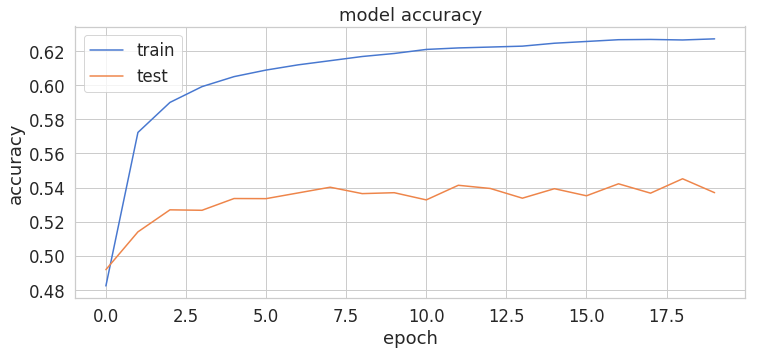

In [45]:
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

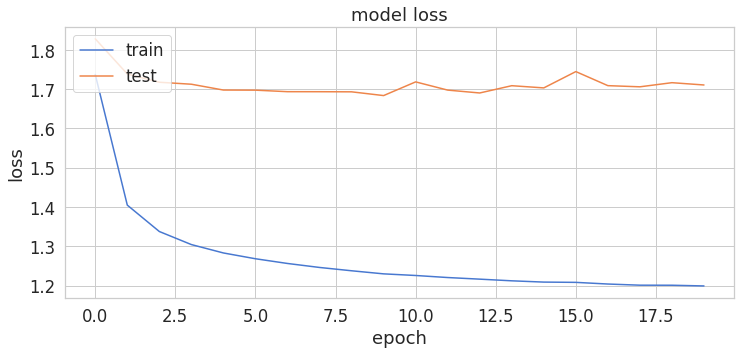

In [46]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

In [0]:
def prepare_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(chars)))

    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.

    return x

In [48]:
prepare_input("This is an example of input for our LSTM".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [0]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [0]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]

        text = text[1:] + next_char
        completion += next_char

        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [0]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [0]:
quotes = [
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "Had it taken place only once a year, it would have been a grievance.",
    "Oh great I found your reservation, you are in room 207.",
    "Oh I am trying to figure out how to do this work better."
]

In [71]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 10))
    print()

it is not a lack of love, but a lack of 
['the ', 'him ', 'mr. ', 'a ', 'it. ', 'your ', 'some ', 'what ', 'every ', 'one ']

had it taken place only once a year, it 
['was ', 'is ', 'should ', 'had ', 'a ', 'must ', 'only ', 'to ', 'could ', 'not ']

oh great i found your reservation, you a
['re ', 'nd ', 'lways ', 's ', ' seem ', 'ppear ', 'muse ', 'gain. ', 't ', 'ccepting ']

oh i am trying to figure out how to do t
['he ', 'o ', 'ime ', 'ake ', 'ender ', 'tand ', 'rie! ', ' a ', 'urnest ', 'nothing ']

